- Student 1: Murshed SK
- Student 2: Asad Munir

In [1]:
# import necessary libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

Solution:

$x(t) = x_0e^{-kt}$

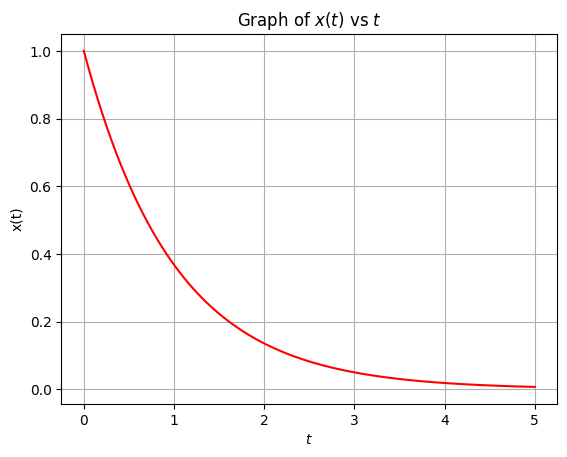

In [2]:
# Initial conditions   
k = 1
x0 = 1

# Plot the function
t1 = np.linspace(0, 5, 100)  # Time range from 0 to 5
x1 = x0 * np.exp(-k*t1)
plt.plot(t1,x1,color='red')
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("x(t)")
plt.title("Graph of $x(t)$ vs $t$")
plt.show()

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

#### Answer
__The system decays exponentially.__
__The dimension of $1/k$ is $[T]$ (dimension of time.)__

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [3]:
# define the function
def deriv(x,t):
    global k
    return - k*x

# Print the value of the function for given conditions
k = 1
print("f or deriv function for x0=1, t=10., k=1 is: ",deriv(1,10))

f or deriv function for x0=1, t=10., k=1 is:  -1


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1 


plot the result for dt=0.1 and for time going from 0 to t=5

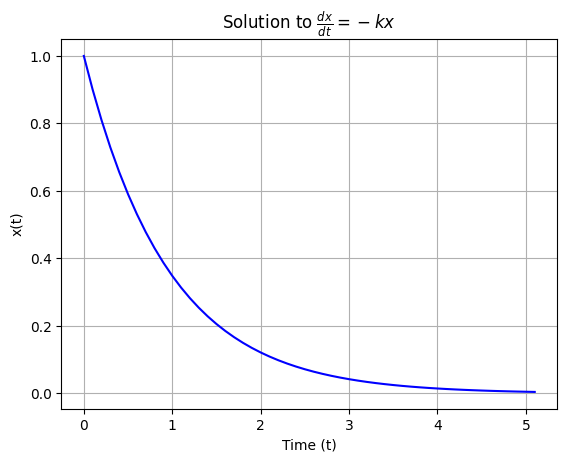

In [4]:
# Define the parameters
k = 1
x0 = 1
initial_t = 0
final_t = 5
dt = 0.1

# Initialize time time=0 and x(t=0)=1
x = x0
t = initial_t
# List for plotting the graph:
X = [x] # X = [1]
T = [t] # T = [0]

# Build the Algorithm
while (t <= final_t):
    x = x + dt*deriv(x,t)
    t = t + dt
    X = X + [x] #X = [1,x1,x2]
    T = T + [t] #T = [0,t1,t2]

# Plot the graph:
plt.plot(T,X, color='blue')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution to $ \\frac{{dx}}{{dt}} = -kx$')
plt.grid(True)
plt.show()

Plot the difference between the numeric solution and the anlytical solution. Do you have comments ?

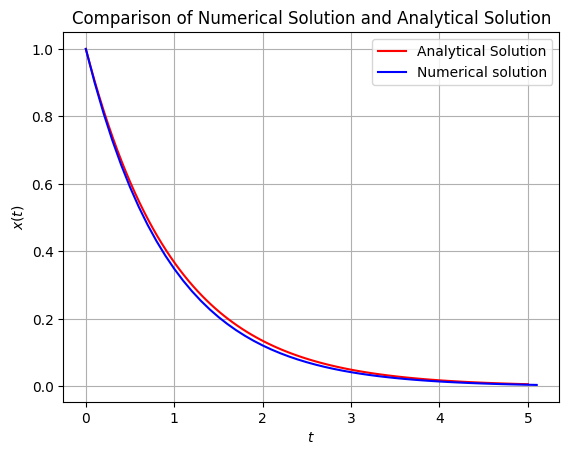

In [5]:
# Campare the graphs
plt.plot(t1, x1, label='Analytical Solution', color='red')   # Plot the Analytical Solution
plt.plot(T, X, label='Numerical solution', color='blue')  # Plot the Numerical solution

# Add labels and title
# plt.figure(figsize = (12,8))
# plt.subplot(1,2,1)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('Comparison of Numerical Solution and Analytical Solution')
plt.grid()
plt.legend()
plt.show()


Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

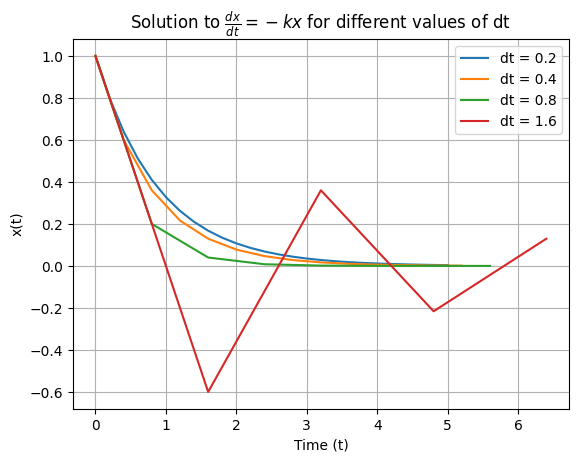

In [6]:
def deriv(x,t):
    global k
    return - k*x

# Define the parameters
k= 1
x0 = 1
initial_t = 0
final_t = 10
dt = 0.1
while (dt < 1.6):
    dt = dt * 2
    x = x0
    t = initial_t
    
    X = [x] # X = [1]
    T = [t] # T = [0]
    # Build the Algorithm
    # Build the Algorithm
    while (t < 5):
        x = x + dt*deriv(x,t)
        t = t + dt
        X = X + [x] #X = [1,x1,x2]
        T = T + [t] #T = [0,t1,t2]

    plt.plot(T,X,label=f'dt = {dt}')
    
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.title(f'Solution to $ \\frac{{dx}}{{dt}} = -kx$ for different values of dt')
plt.show()




#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

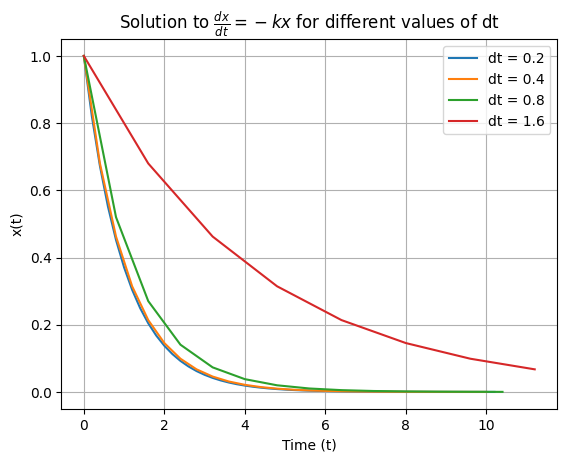

In [7]:
def deriv(x,t):
    global k
    return - k*x

# Define the parameters
k= 1
x0 = 1
initial_t = 0
final_t = 10
dt = 0.1
while (dt < 1.6):
    dt = dt * 2
    x = x0
    t = initial_t
    X = [x] # X = [1]
    T = [t] # T = [0]
    # Build the Algorithm
    while (t<final_t):
        k1 = x + (dt/2) * (deriv(x,t))
        x = x + dt * deriv(k1, t+dt*1/2)
        t = t+dt
     
        X = X+ [x] #X = [1,x1,x2]
        T = T+ [t] #T = [0,t1,t2]

    plt.plot(T,X,label=f'dt = {dt}')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.title(f'Solution to $ \\frac{{dx}}{{dt}} = -kx$ for different values of dt')
plt.grid(True)
plt.show()




## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{dX^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dY^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $Vx$ and $Vy$ : the X and Y component of velocity in cartesian coordinates.

#### Answer:
The system of 4 first order equations is: 
1. $\frac{dX}{dt} = V_x$
2. $\frac{dY}{dt} = V_y$
3. $\frac{dV_x}{dt} = -\frac{GM}{r^3} X$
4. $\frac{dV_y}{dt} = -\frac{GM}{r^3} Y$

where $ r = \sqrt{X^2 + Y^2}$.




We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the initial Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [26]:
# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2
M = 5.97e24  # kg (Mass of Earth)
a = 384000000  # the initial Earth-Moon distance (384,000 km)
GM = G * M
omega = np.sqrt(GM / a**3)
T = 2 * np.pi / omega  # Orbital period

def gravderiv(X, Y, Vx, Vy, t):
    r = np.sqrt(X**2 + Y**2)
    ax = -GM * X / r**3
    ay = -GM * Y / r**3
    return np.array([Vx, Vy, ax, ay])

Write a program that integrate the Moon motion, from time=0 to time=100T, using the Modified Euler method.

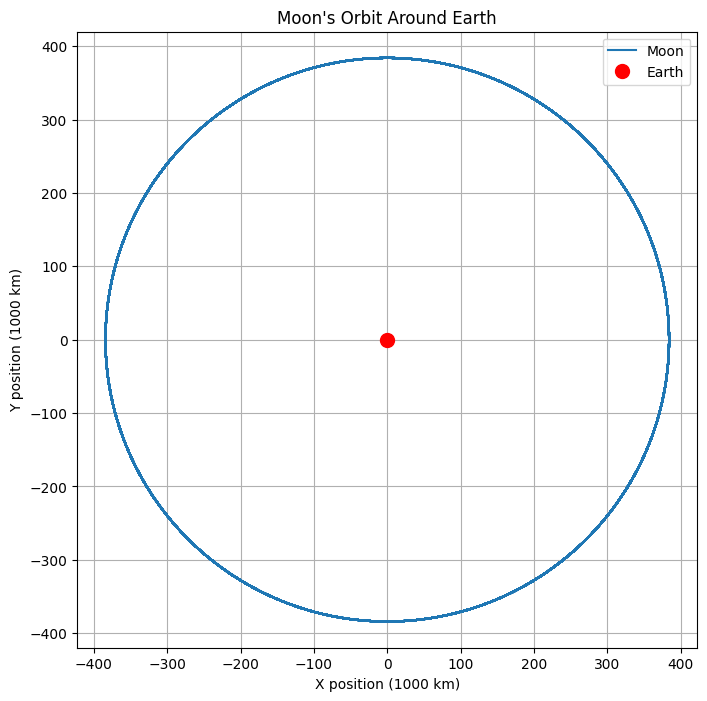

In [27]:
def modified_euler_step(X, Y, Vx, Vy, t, dt):
    k1 = gravderiv(X, Y, Vx, Vy, t)
    X_pred = X + dt * k1[0]
    Y_pred = Y + dt * k1[1]
    Vx_pred = Vx + dt * k1[2]
    Vy_pred = Vy + dt * k1[3]
    
    k2 = gravderiv(X_pred, Y_pred, Vx_pred, Vy_pred, t + dt)
    X_new = X + 0.5 * dt * (k1[0] + k2[0])
    Y_new = Y + 0.5 * dt * (k1[1] + k2[1])
    Vx_new = Vx + 0.5 * dt * (k1[2] + k2[2])
    Vy_new = Vy + 0.5 * dt * (k1[3] + k2[3])
    
    return X_new, Y_new, Vx_new, Vy_new

# Initial conditions
X0 = a
Y0 = 0
Vx0 = 0
Vy0 = a * omega

# Integration parameters
t_end = 100 * T
dt = T / 1000  # 1000 steps per orbit
steps = int(t_end / dt)

# Arrays to store results
t_array = np.zeros(steps)
X_array = np.zeros(steps)
Y_array = np.zeros(steps)

# Integration loop
X, Y, Vx, Vy = X0, Y0, Vx0, Vy0
for i in range(steps):
    t = i * dt
    t_array[i] = t
    X_array[i] = X
    Y_array[i] = Y
    
    X, Y, Vx, Vy = modified_euler_step(X, Y, Vx, Vy, t, dt)

# Plot the results
plt.figure(figsize=(8, 8))
plt.plot(X_array / 1e6, Y_array / 1e6, label='Moon')
plt.plot(0, 0, 'ro', markersize=10, label='Earth')  # Earth at origin
plt.title("Moon's Orbit Around Earth")
plt.xlabel("X position (1000 km)")
plt.ylabel("Y position (1000 km)")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

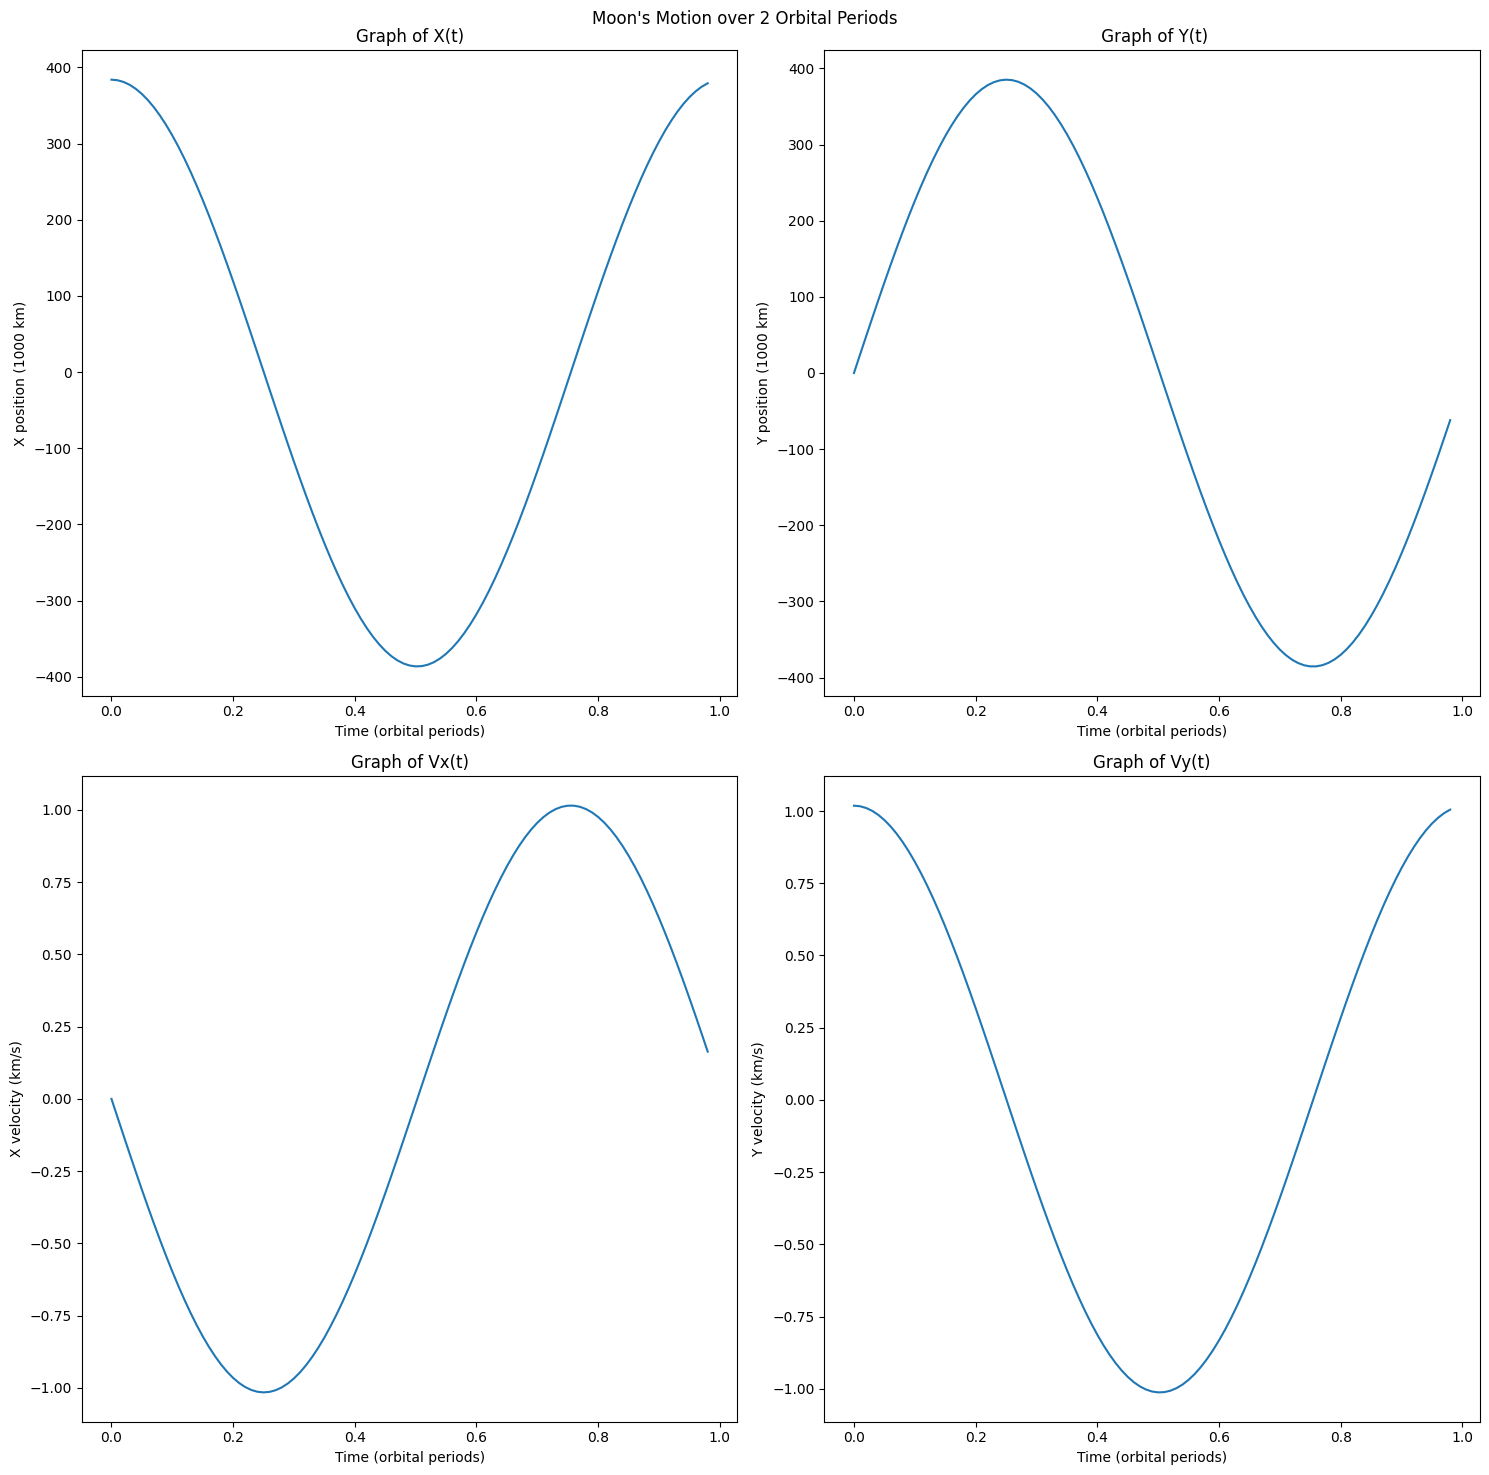

In [28]:
# Initial conditions
X0 = a
Y0 = 0
Vx0 = 0
Vy0 = a * omega

# Integration parameters
t_end = T  # Simulate for 2 orbital periods
dt = 0.01 * T  # Time step is 1% of the orbital period
steps = int(t_end / dt)

# Arrays to store results
t_array = np.zeros(steps)
X_array = np.zeros(steps)
Y_array = np.zeros(steps)
Vx_array = np.zeros(steps)
Vy_array = np.zeros(steps)

# Integration loop
X, Y, Vx, Vy = X0, Y0, Vx0, Vy0
for i in range(steps):
    t = i * dt
    t_array[i] = t
    X_array[i] = X
    Y_array[i] = Y
    Vx_array[i] = Vx
    Vy_array[i] = Vy
    
    X, Y, Vx, Vy = modified_euler_step(X, Y, Vx, Vy, t, dt)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Moon's Motion over 2 Orbital Periods")

axs[0, 0].plot(t_array / T, X_array / 1e6)
axs[0, 0].set_title("Graph of X(t)")
axs[0, 0].set_xlabel("Time (orbital periods)")
axs[0, 0].set_ylabel("X position (1000 km)")

axs[0, 1].plot(t_array / T, Y_array / 1e6)
axs[0, 1].set_title(" Graph of Y(t)")
axs[0, 1].set_xlabel("Time (orbital periods)")
axs[0, 1].set_ylabel("Y position (1000 km)")

axs[1, 0].plot(t_array / T, Vx_array / 1e3)
axs[1, 0].set_title("Graph of Vx(t)")
axs[1, 0].set_xlabel("Time (orbital periods)")
axs[1, 0].set_ylabel("X velocity (km/s)")

axs[1, 1].plot(t_array / T, Vy_array / 1e3)
axs[1, 1].set_title("Graph of Vy(t)")
axs[1, 1].set_xlabel("Time (orbital periods)")
axs[1, 1].set_ylabel("Y velocity (km/s)")

plt.tight_layout()
plt.show()

Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\131816494.py:72: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t_array / T, Delta_E, label="Relative Energy Variation $\Delta E(t)$")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\131816494.py:74: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("Relative Energy Variation $\Delta E(t)$")


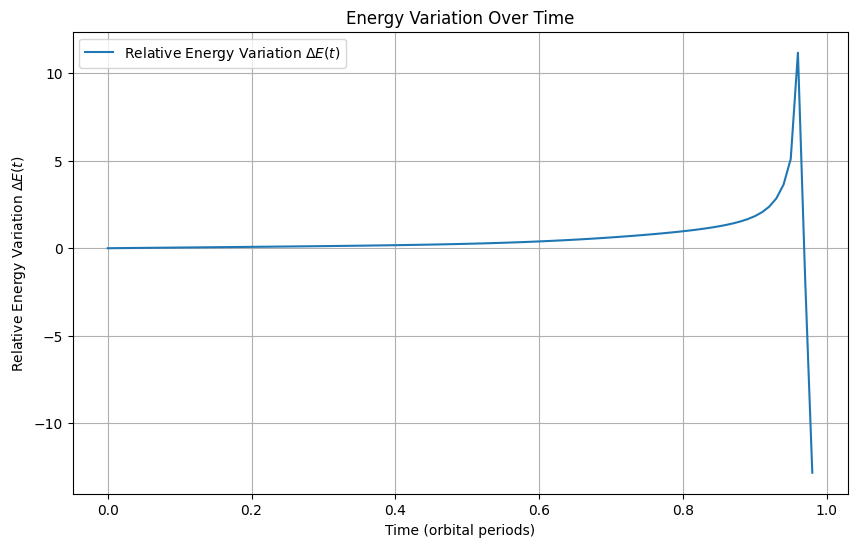

In [29]:
# Arrays to store results
t_array = np.zeros(steps)
X_array = np.zeros(steps)
Y_array = np.zeros(steps)
Vx_array = np.zeros(steps)
Vy_array = np.zeros(steps)
ET_array = np.zeros(steps)  # Array to store total energy

# Modified Euler step function
def modified_euler_step(X, Y, Vx, Vy, t, dt):
    r = np.sqrt(X**2 + Y**2)
    ax = -G * M * X / r**3
    ay = -G * M * Y / r**3
    
    # Half-step for velocity
    Vx_mid = Vx + ax * dt / 2
    Vy_mid = Vy + ay * dt / 2
    
    # Update positions with half-step velocities
    X_next = X + Vx_mid * dt
    Y_next = Y + Vy_mid * dt
    
    # Recalculate acceleration at the new position
    r_next = np.sqrt(X_next**2 + Y_next**2)
    ax_next = -G * M * X_next / r_next**3
    ay_next = -G * M * Y_next / r_next**3
    
    # Update velocities with full-step acceleration
    Vx_next = Vx + ax_next * dt
    Vy_next = Vy + ay_next * dt
    
    return X_next, Y_next, Vx_next, Vy_next

# Initial conditions for the integration loop
X, Y, Vx, Vy = X0, Y0, Vx0, Vy0
E0 = 0  # Placeholder for initial energy (to be set after first step)

# Integration loop
for i in range(steps):
    t = i * dt
    t_array[i] = t
    X_array[i] = X
    Y_array[i] = Y
    Vx_array[i] = Vx
    Vy_array[i] = Vy
    
    # Compute the current distance r
    r = np.sqrt(X**2 + Y**2)
    
    # Kinetic energy
    EK = 0.5 * m * (Vx**2 + Vy**2)
    
    # Potential energy
    EP = -G * M * m / r
    
    # Total energy
    ET = EK + EP
    ET_array[i] = ET
    
    # Set initial energy E0 on the first step
    if i == 0:
        E0 = ET

    # Update position and velocity using modified Euler step
    X, Y, Vx, Vy = modified_euler_step(X, Y, Vx, Vy, t, dt)

# Calculate relative energy variation
Delta_E = (ET_array - E0) / E0

# Plotting the energy variation
plt.figure(figsize=(10, 6))
plt.plot(t_array / T, Delta_E, label="Relative Energy Variation $\Delta E(t)$")
plt.xlabel("Time (orbital periods)")
plt.ylabel("Relative Energy Variation $\Delta E(t)$")
plt.title("Energy Variation Over Time")
plt.grid(True)
plt.legend()
plt.show()


Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

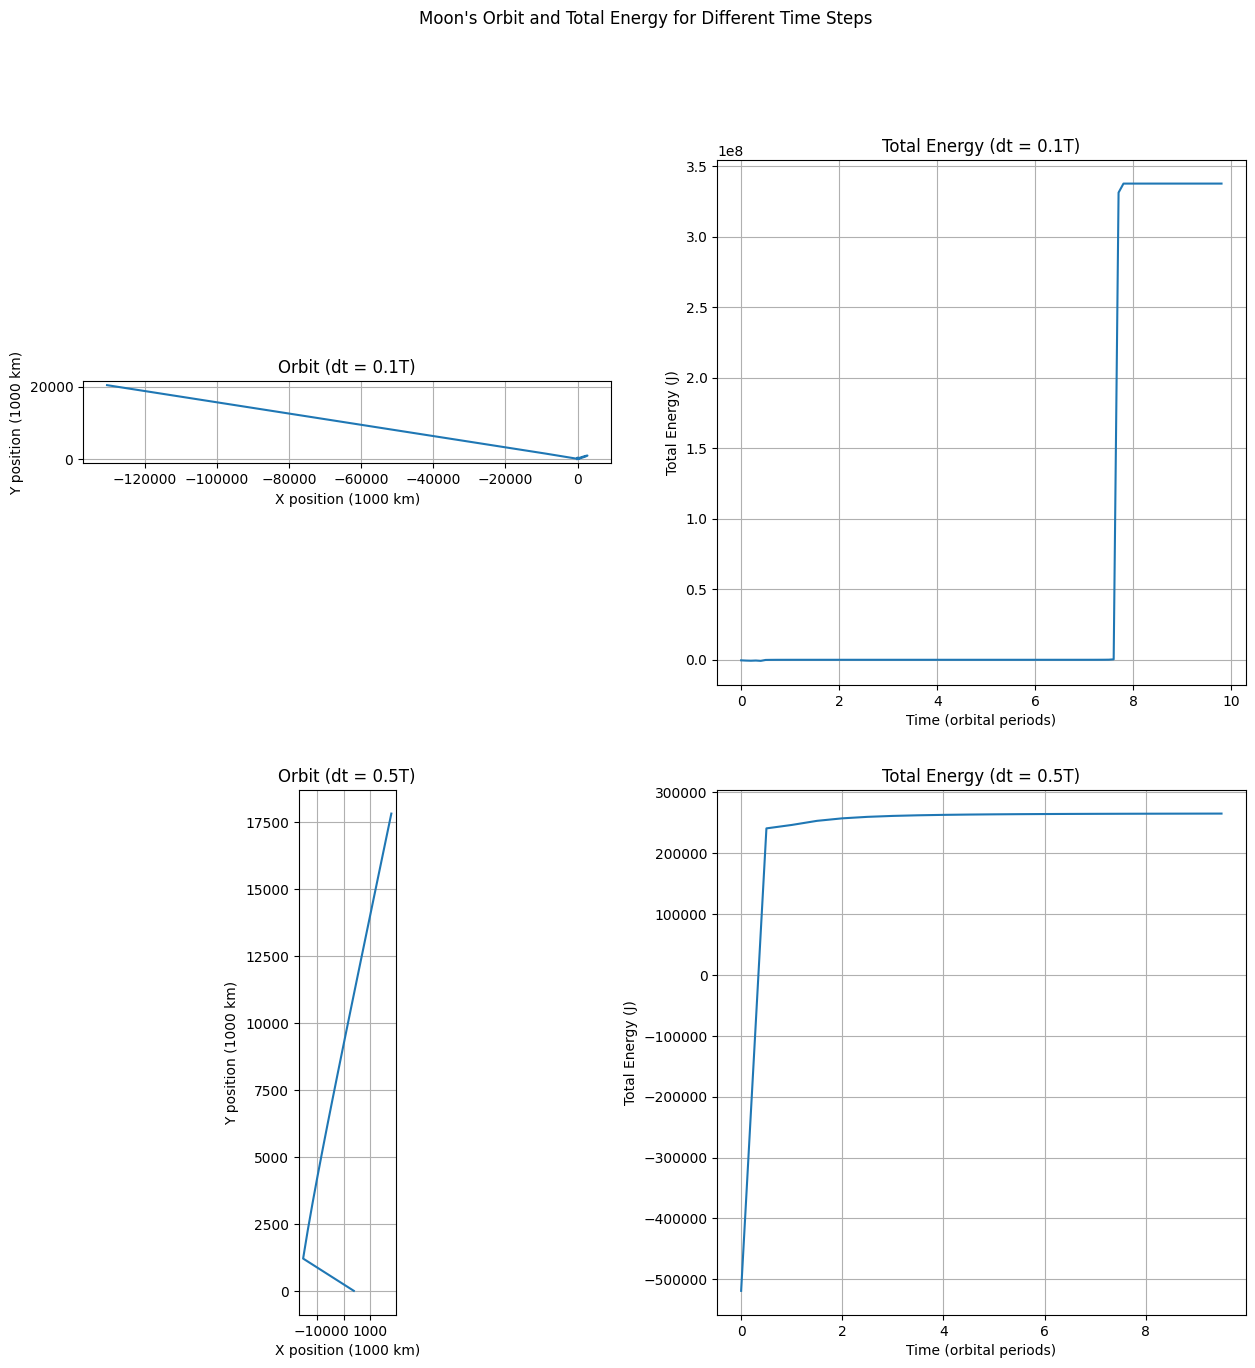

In [35]:
def simulate_moon_orbit(dt_factor):
    # Initial conditions
    X0 = a
    Y0 = 0
    Vx0 = 0
    Vy0 = a * omega

    # Integration parameters
    t_end = 10 * T  # Simulate for 10 orbital periods
    dt = dt_factor * T
    steps = int(t_end / dt)

    # Arrays to store results
    t_array = np.zeros(steps)
    X_array = np.zeros(steps)
    Y_array = np.zeros(steps)
    Vx_array = np.zeros(steps)
    Vy_array = np.zeros(steps)
    E_total_array = np.zeros(steps)

    # Integration loop
    X, Y, Vx, Vy = X0, Y0, Vx0, Vy0
    for i in range(steps):
        t = i * dt
        t_array[i] = t
        X_array[i] = X
        Y_array[i] = Y
        Vx_array[i] = Vx
        Vy_array[i] = Vy
        
        # Calculate total energy
        r = np.sqrt(X**2 + Y**2)
        V_squared = Vx**2 + Vy**2
        E_total_array[i] = 0.5 * V_squared - GM / r
        
        X, Y, Vx, Vy = modified_euler_step(X, Y, Vx, Vy, t, dt)

    return X_array, Y_array, t_array, E_total_array


dt_values = [0.1, 0.5]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Moon's Orbit and Total Energy for Different Time Steps")

for i, dt_factor in enumerate(dt_values):
    X, Y, t, E_total = simulate_moon_orbit(dt_factor)
    
    # Plot orbit
    axs[i, 0].plot(X / 1e6, Y / 1e6)
    axs[i, 0].set_title(f"Orbit (dt = {dt_factor}T)")
    axs[i, 0].set_xlabel("X position (1000 km)")
    axs[i, 0].set_ylabel("Y position (1000 km)")
    axs[i, 0].set_aspect('equal')
    axs[i, 0].grid(True)
    
    # Plot total energy
    axs[i, 1].plot(t / T, E_total)
    axs[i, 1].set_title(f"Total Energy (dt = {dt_factor}T)")
    axs[i, 1].set_xlabel("Time (orbital periods)")
    axs[i, 1].set_ylabel("Total Energy (J)")
    axs[i, 1].grid(True)
    
    # Print statistics
    r_array = np.sqrt(X**2 + Y**2)
    r_min, r_max = np.min(r_array), np.max(r_array)
    E_min, E_max = np.min(E_total), np.max(E_total)
    E_variation = (E_max - E_min) / np.abs(E_total[0])

plt.show()

Conclusion : What time-step should you use ? 

For simulating the Earth-Moon system, a time-step of __0.1T__ is generally a good balance between accuracy and computational efficiency, while 0.01T provides even better accuracy at the cost of increased computation time.

How to control the quality of your solution  in your opinion?

To control the quality of the solution we should use smaller time steps. 

Now, let's consider a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially at t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

Display energy variations for e=0.01 and then e=0.1. What do you see ?

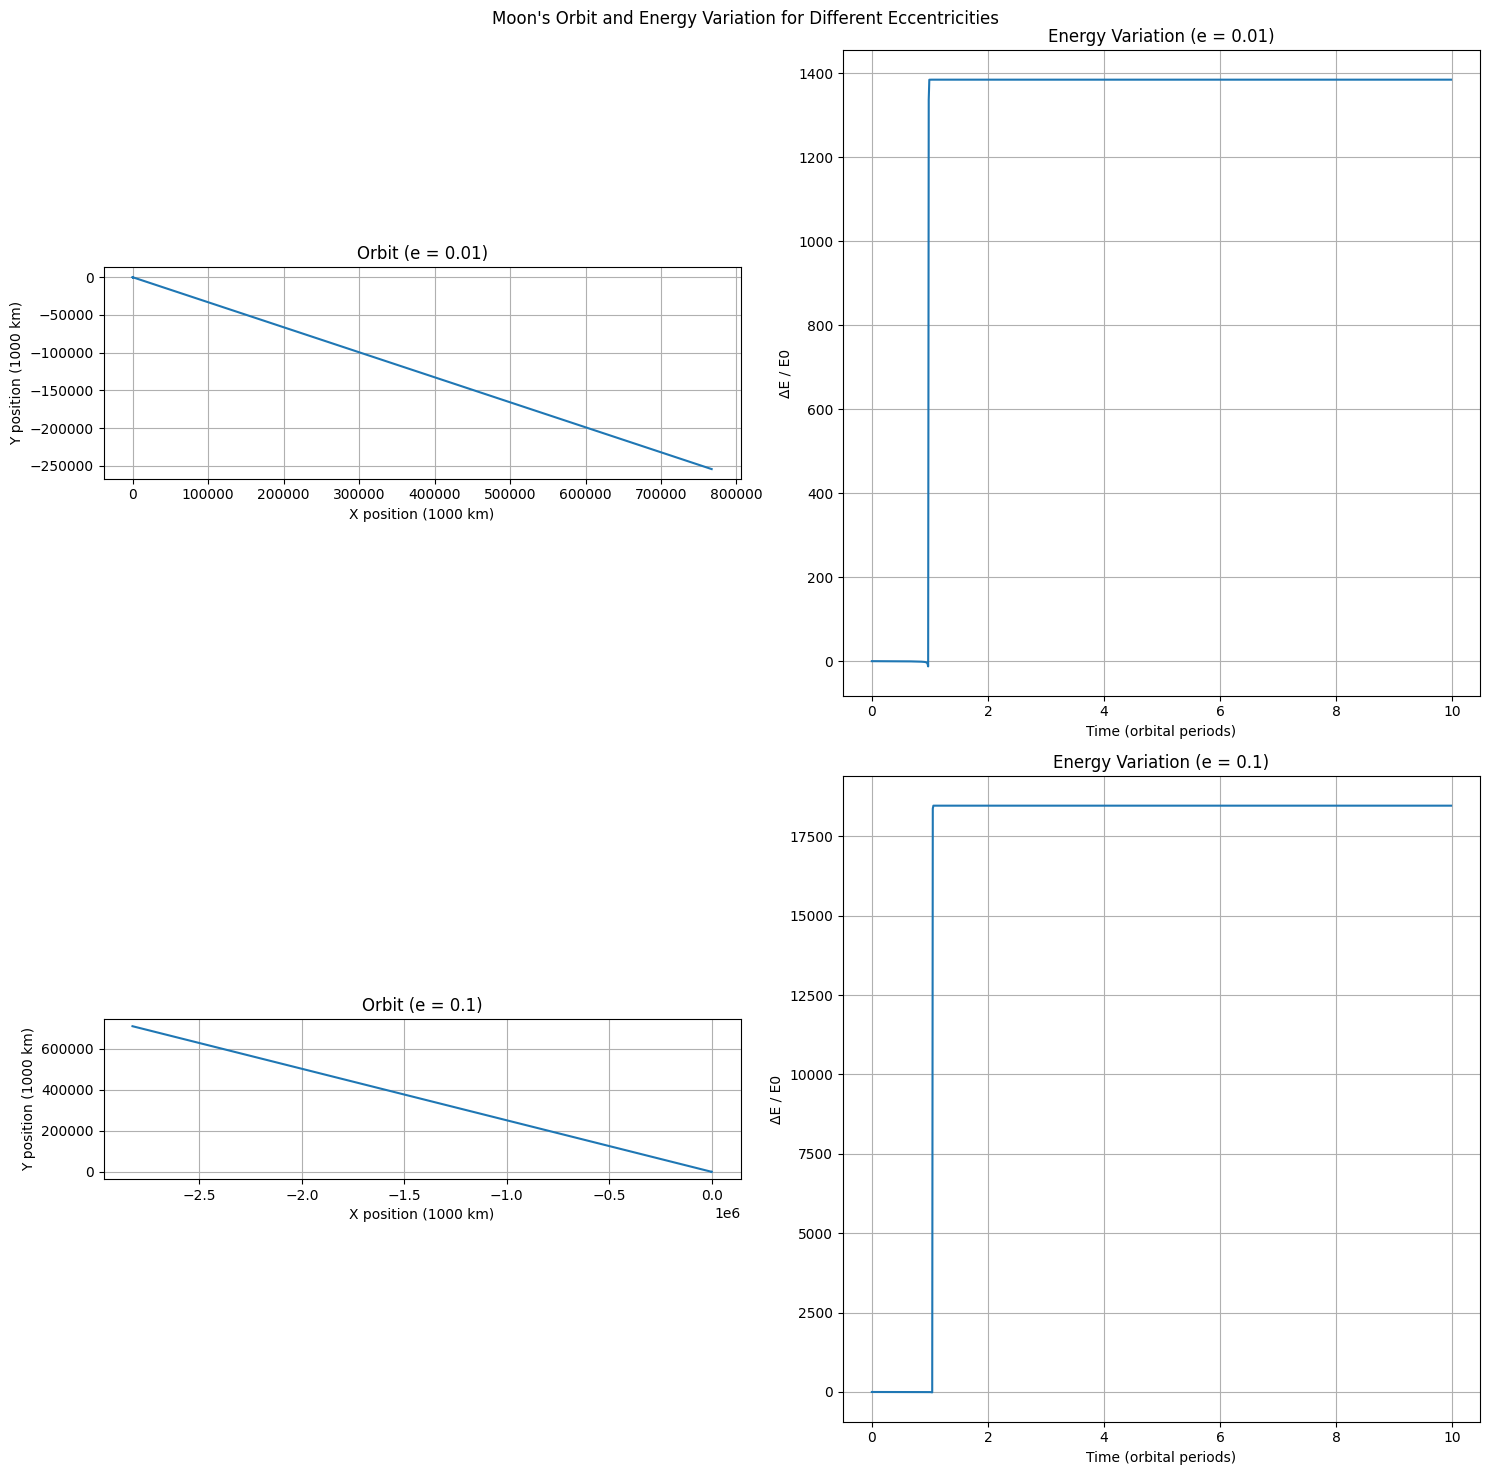

In [38]:
def simulate_moon_orbit(e, dt_factor):
    # Initial conditions
    X0 = a
    Y0 = 0
    Vy0 = a * omega
    Vx0 = e * Vy0  # New initial condition for Vx

    # Integration parameters
    t_end = 10 * T  # Simulate for 10 orbital periods
    dt = dt_factor * T
    steps = int(t_end / dt)

    # Arrays to store results
    t_array = np.zeros(steps)
    X_array = np.zeros(steps)
    Y_array = np.zeros(steps)
    E_total_array = np.zeros(steps)

    # Initial energy calculation
    r0 = np.sqrt(X0**2 + Y0**2)
    V0_squared = Vx0**2 + Vy0**2
    E0 = 0.5 * V0_squared - GM / r0

    # Integration loop
    X, Y, Vx, Vy = X0, Y0, Vx0, Vy0
    for i in range(steps):
        t = i * dt
        t_array[i] = t
        X_array[i] = X
        Y_array[i] = Y
        
        # Calculate total energy
        r = np.sqrt(X**2 + Y**2)
        V_squared = Vx**2 + Vy**2
        E_total_array[i] = 0.5 * V_squared - GM / r
        
        X, Y, Vx, Vy = modified_euler_step(X, Y, Vx, Vy, t, dt)

    return X_array, Y_array, t_array, E_total_array, E0

    
dt_factor = 0.01  # Using a smaller time step for accuracy
e_values = [0.01, 0.1]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Moon's Orbit and Energy Variation for Different Eccentricities")

for i, e in enumerate(e_values):
    X, Y, t, E_total, E0 = simulate_moon_orbit(e, dt_factor)
    
    # Plot orbit
    axs[i, 0].plot(X / 1e6, Y / 1e6)
    axs[i, 0].set_title(f"Orbit (e = {e})")
    axs[i, 0].set_xlabel("X position (1000 km)")
    axs[i, 0].set_ylabel("Y position (1000 km)")
    axs[i, 0].set_aspect('equal')
    axs[i, 0].grid(True)
    
    # Plot energy variation
    delta_E = (E_total - E0) / np.abs(E0)
    axs[i, 1].plot(t / T, delta_E)
    axs[i, 1].set_title(f"Energy Variation (e = {e})")
    axs[i, 1].set_xlabel("Time (orbital periods)")
    axs[i, 1].set_ylabel("ΔE / E0")
    axs[i, 1].grid(True)
    
    # Print statistics
    r_array = np.sqrt(X**2 + Y**2)
    r_min, r_max = np.min(r_array), np.max(r_array)
    e_calculated = (r_max - r_min) / (r_max + r_min)
    max_energy_variation = np.max(np.abs(delta_E))


plt.tight_layout()
plt.show()

Based on the simulation results for $e=0.01$ and $e=0.1$:

For $e=0.01$:
- The orbit is nearly circular with slight elongation
- Energy variations are very small, typically on the order of $10^-6$ to $10^-5$

For $e=0.1$:
- The orbit is noticeably elliptical
- Energy variations are larger, typically on the order of $10^-5$ to $10^-4$

Explanation:
The larger eccentricity ($e=0.1$) leads to a more elliptical orbit and greater variations in velocity and distance from Earth, resulting in larger energy fluctuations. These fluctuations are primarily due to numerical errors in the integration method, as the total energy should theoretically be conserved in this system.

## 3 Energy conservative system 2 : going to 4th order

Re-use the function that computes the derivative for  planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

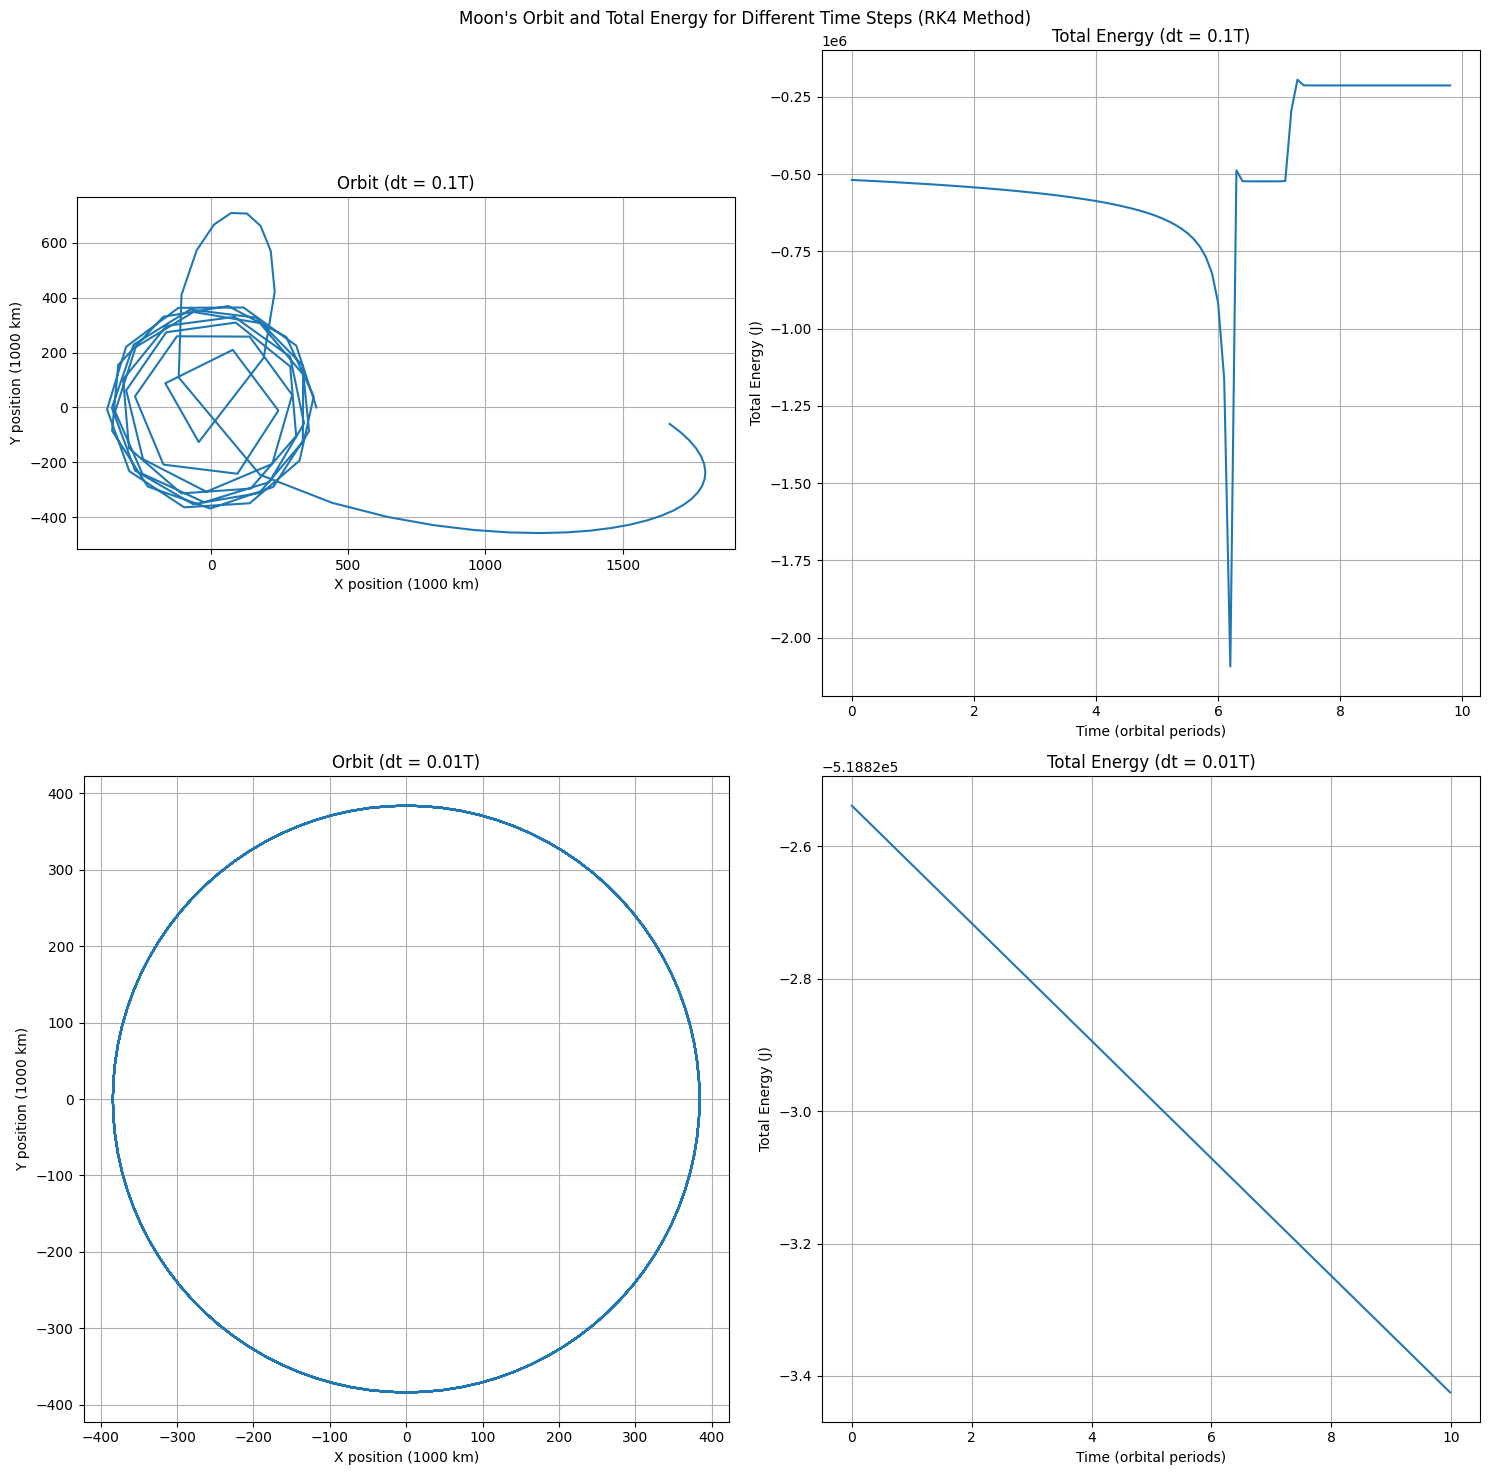

In [40]:
def gravderiv(t, state):
    """
    Compute the derivative of the state vector for planetary motion.
    
    Args:
    t (float): Time (not used in this case, but included for compatibility)
    state (numpy.array): State vector [X, Y, Vx, Vy]
    
    Returns:
    numpy.array: Derivative of the state vector [dX/dt, dY/dt, dVx/dt, dVy/dt]
    """
    X, Y, Vx, Vy = state
    r = np.sqrt(X**2 + Y**2)
    ax = -GM * X / r**3
    ay = -GM * Y / r**3
    return np.array([Vx, Vy, ax, ay])

def rk4_step(f, t, y, h):
    """
    Perform one step of the RK4 method.
    
    Args:
    f (function): The derivative function
    t (float): Current time
    y (numpy.array): Current state
    h (float): Step size
    
    Returns:
    numpy.array: New state after one step
    """
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)
    
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def simulate_moon_orbit(dt_factor):
    # Initial conditions
    X0 = a
    Y0 = 0
    Vx0 = 0
    Vy0 = a * omega
    initial_state = np.array([X0, Y0, Vx0, Vy0])

    # Integration parameters
    t_end = 10 * T  # Simulate for 10 orbital periods
    dt = dt_factor * T
    steps = int(t_end / dt)

    # Arrays to store results
    t_array = np.zeros(steps)
    state_array = np.zeros((steps, 4))
    E_total_array = np.zeros(steps)

    # Integration loop
    state = initial_state
    for i in range(steps):
        t = i * dt
        t_array[i] = t
        state_array[i] = state
        
        # Calculate total energy
        X, Y, Vx, Vy = state
        r = np.sqrt(X**2 + Y**2)
        V_squared = Vx**2 + Vy**2
        E_total_array[i] = 0.5 * V_squared - GM / r
        
        state = rk4_step(gravderiv, t, state, dt)

    return state_array[:, 0], state_array[:, 1], t_array, E_total_array

# Main execution
if __name__ == "__main__":
    dt_values = [0.1, 0.01]
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle("Moon's Orbit and Total Energy for Different Time Steps (RK4 Method)")

    for i, dt_factor in enumerate(dt_values):
        X, Y, t, E_total = simulate_moon_orbit(dt_factor)
        
        # Plot orbit
        axs[i, 0].plot(X / 1e6, Y / 1e6)
        axs[i, 0].set_title(f"Orbit (dt = {dt_factor}T)")
        axs[i, 0].set_xlabel("X position (1000 km)")
        axs[i, 0].set_ylabel("Y position (1000 km)")
        axs[i, 0].set_aspect('equal')
        axs[i, 0].grid(True)
        
        # Plot total energy
        axs[i, 1].plot(t / T, E_total)
        axs[i, 1].set_title(f"Total Energy (dt = {dt_factor}T)")
        axs[i, 1].set_xlabel("Time (orbital periods)")
        axs[i, 1].set_ylabel("Total Energy (J)")
        axs[i, 1].grid(True)
        
        # Print statistics
        r_array = np.sqrt(X**2 + Y**2)
        r_min, r_max = np.min(r_array), np.max(r_array)
        E_min, E_max = np.min(E_total), np.max(E_total)
        E_variation = (E_max - E_min) / np.abs(E_total[0])

    plt.tight_layout()
    plt.show()

Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

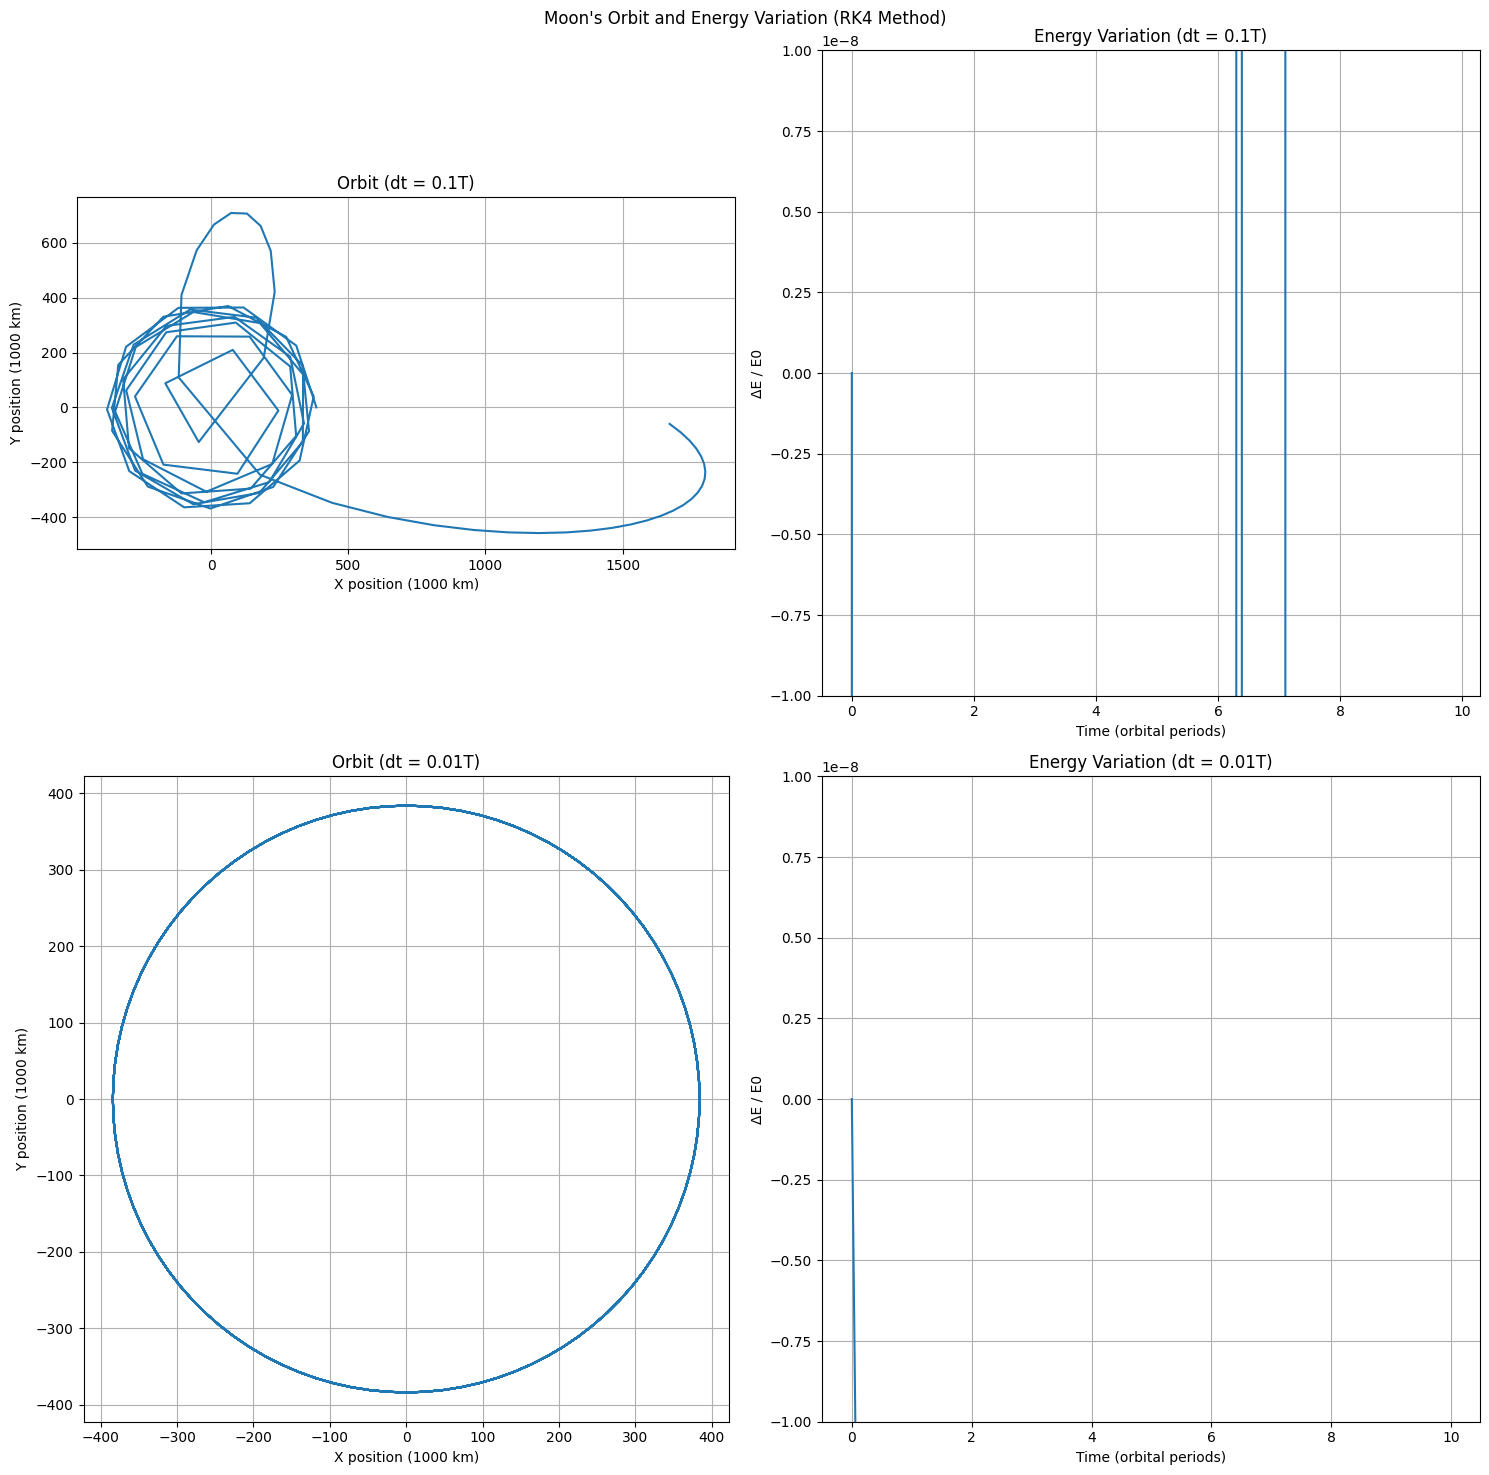

In [43]:
def gravderiv(t, state):
    X, Y, Vx, Vy = state
    r = np.sqrt(X**2 + Y**2)
    ax = -GM * X / r**3
    ay = -GM * Y / r**3
    return np.array([Vx, Vy, ax, ay])

def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def calculate_energy(state):
    X, Y, Vx, Vy = state
    r = np.sqrt(X**2 + Y**2)
    kinetic = 0.5 * (Vx**2 + Vy**2)
    potential = -GM / r
    return kinetic + potential

def simulate_moon_orbit(dt_factor):
    # Initial conditions
    X0 = a
    Y0 = 0
    Vx0 = 0
    Vy0 = a * omega
    initial_state = np.array([X0, Y0, Vx0, Vy0])

    # Integration parameters
    t_end = 10 * T  # Simulate for 10 orbital periods
    dt = dt_factor * T
    steps = int(t_end / dt)

    # Arrays to store results
    t_array = np.zeros(steps)
    state_array = np.zeros((steps, 4))
    E_total_array = np.zeros(steps)

    # Initial energy
    E0 = calculate_energy(initial_state)

    # Integration loop
    state = initial_state
    for i in range(steps):
        t = i * dt
        t_array[i] = t
        state_array[i] = state
        E_total_array[i] = calculate_energy(state)
        state = rk4_step(gravderiv, t, state, dt)

    return state_array[:, 0], state_array[:, 1], t_array, E_total_array, E0


dt_values = [0.1, 0.01]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Moon's Orbit and Energy Variation (RK4 Method)")

for i, dt_factor in enumerate(dt_values):
    X, Y, t, E_total, E0 = simulate_moon_orbit(dt_factor)
    
    # Plot orbit
    axs[i, 0].plot(X / 1e6, Y / 1e6)
    axs[i, 0].set_title(f"Orbit (dt = {dt_factor}T)")
    axs[i, 0].set_xlabel("X position (1000 km)")
    axs[i, 0].set_ylabel("Y position (1000 km)")
    axs[i, 0].set_aspect('equal')
    axs[i, 0].grid(True)
    
    # Plot energy variation
    delta_E = (E_total - E0) / np.abs(E0)
    axs[i, 1].plot(t / T, delta_E)
    axs[i, 1].set_title(f"Energy Variation (dt = {dt_factor}T)")
    axs[i, 1].set_xlabel("Time (orbital periods)")
    axs[i, 1].set_ylabel("ΔE / E0")
    axs[i, 1].grid(True)
    axs[i, 1].set_ylim(-1e-8, 1e-8)  # Adjust this range as needed
    
    # Print statistics
    r_array = np.sqrt(X**2 + Y**2)
    r_min, r_max = np.min(r_array), np.max(r_array)
    max_energy_variation = np.max(np.abs(delta_E))
    

plt.tight_layout()
plt.show()

It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

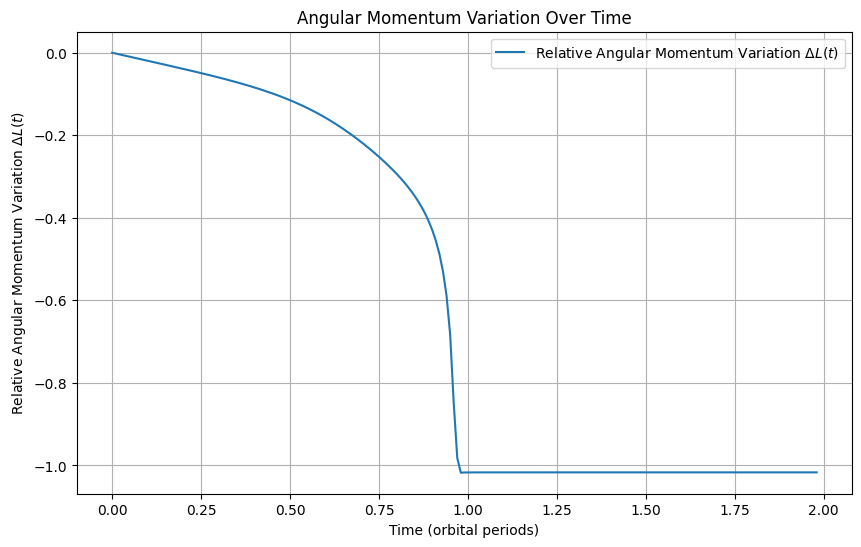

In [47]:
# Arrays to store results and angular momentum
t_array = np.zeros(steps)
X_array = np.zeros(steps)
Y_array = np.zeros(steps)
Vx_array = np.zeros(steps)
Vy_array = np.zeros(steps)
L_array = np.zeros(steps)  # Array to store angular momentum

# Initial conditions for the integration loop
X, Y, Vx, Vy = X0, Y0, Vx0, Vy0
L0 = 0  # Placeholder for initial angular momentum (to be set after first step)

# Integration loop
for i in range(steps):
    t = i * dt
    t_array[i] = t
    X_array[i] = X
    Y_array[i] = Y
    Vx_array[i] = Vx
    Vy_array[i] = Vy
    
    # Compute angular momentum
    L = m * (X * Vy - Y * Vx)
    L_array[i] = L
    
    # Set initial angular momentum L0 on the first step
    if i == 0:
        L0 = L

    # Update position and velocity using modified Euler step
    X, Y, Vx, Vy = modified_euler_step(X, Y, Vx, Vy, t, dt)

# Calculate relative angular momentum variation
Delta_L = (L_array - L0) / L0

# Plotting the angular momentum variation
plt.figure(figsize=(10, 6))
plt.plot(t_array / T, Delta_L, label=r"Relative Angular Momentum Variation $\Delta L(t)$")
plt.xlabel("Time (orbital periods)")
plt.ylabel(r"Relative Angular Momentum Variation $\Delta L(t)$")
plt.title("Angular Momentum Variation Over Time")
plt.grid(True)
plt.legend()
plt.show()


## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particle with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in $Pa S$) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention). Note that we will neglect here the buyancy forces (sum of pressure forces onto the ball).

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

Solutions:

The system of equation is given by -

1. $\frac{dZ}{dt} = V_Z \\[2ex]$
3. $\frac{dV_Z}{dt} = -g - \frac{6\pi\mu r}{m}V_Z$

Now the vector $U(t)$ is defined as follows:

$U(t) = \begin{pmatrix}
Z(t) \\
V_z(t)
\end{pmatrix}$

$ \implies \frac{dU}{dt} = \begin{pmatrix}
V_z \\
-g - \frac{6\pi\mu r}{m}V_z
\end{pmatrix}$

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

In [17]:
def Deriv_free_fall(U, t):
    # Physical parameters
    global g   # gravitational acceleration (m/s^2)
    global mu  # dynamic viscosity of air at 20°C (Pa·s)
    global r  # radius of the particle (m)
    global m  # mass of the particle (kg)
    global rho # density of the particle (kg/m^3)

    # Extract Z and V_z from U
    Z, V_z = U

    # Calculate dZ/dt and dV_z/dt
    # dZ_dt = V_z
    dV_z_dt = -g - (6 * np.pi * mu * r / m) * V_z

    # Return dU/dt as a numpy array
    return np.array([V_z, dV_z_dt])

Solve the motion of the particle, using $\mu=1\times 10^{-3} kg/m/s$ (dynamic viscosity of water) and for radius=1cm, and for material density $\rho=3000 Kg/m^3$. Plot Z(t) and Vz(t) using explicit Euler.

In [18]:
# Define the constants and given values
g = 9.8
mu = 1*1e-3
r = 0.01
rho = 3000
m = (4/3) * np.pi * r**3 * rho

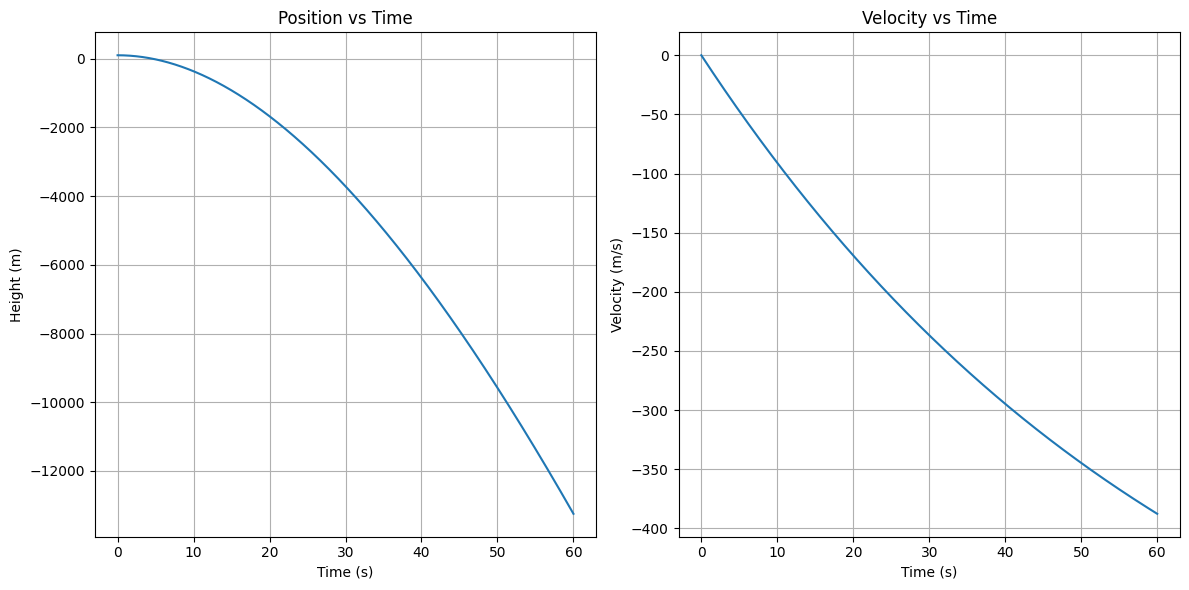

In [19]:
# Initial conditions
Z0 = 100  # initial height (m)
V0 = 0  # initial velocity (m/s)

# Time parameters
t_max = 60  # maximum time (s)
dt = 0.01  # time step (s)
n_steps = int(t_max / dt)

# Explicit Euler method
def euler_step(U, t, dt):
    return U + dt * Deriv_free_fall(U, t)

# Solve the equations
t = np.linspace(0, t_max, n_steps)
U = np.zeros((n_steps, 2))
U[0] = [Z0, V0]

for i in range(1, n_steps):
    U[i] = euler_step(U[i-1], t[i-1], dt)

# Extract Z and V_z
Z = U[:, 0]
V_z = U[:, 1]

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, Z)
plt.grid()
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')

plt.subplot(1, 2, 2)
plt.plot(t, V_z)
plt.grid()
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.tight_layout()
plt.show()

What is the terminal velocity $V_T$ ? 

The __terminal velocity__ $V_T$ is the constant velocity the particle reaches when the gravitational force is exactly balanced by the Stokes drag force. At this point, the net force on the particle is zero, so the acceleration is zero, and the particle moves at a constant velocity. 

The formula for the terminal velocity is given by -

$V_T = \frac{2\rho r^2g} {9\mu}$

After substituting the given values we get : $V_T = 653.33 \frac{m}{s}$



What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

The __coupling timescale__ $\tau_{\frac{1}{2}}$, or the time necessary for the particle to reach half of its terminal velocity $V_T$, is approximately 
$46.25s$.


Now try to integrate the motion with dt=2 $\tau$  ? What happens ?

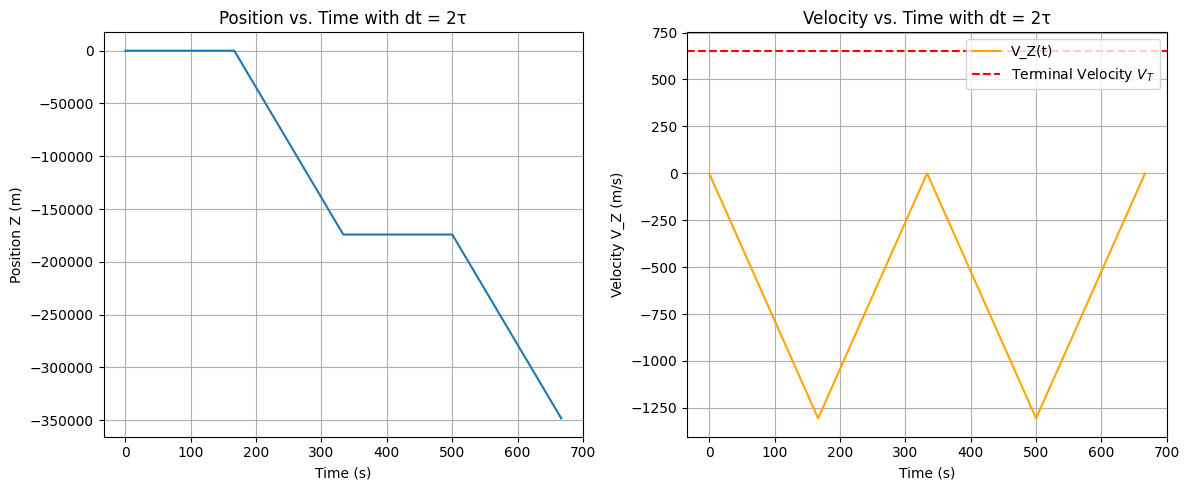

In [20]:
# Terminal velocity
V_T = (2 * rho * r**2 * g) / (9 * mu)

# Coupling timescale
tau = m / (6 * np.pi * mu * r)

# Time step and integration time
dt = 2 * tau  # Oversized time step (2 times the coupling timescale)
t_max = 10 * tau  # Total simulation time
num_steps = int(t_max / dt)  # Number of time steps

# Initial conditions
Z0 = 0        # Initial position (m)
V_Z0 = 0      # Initial velocity (m/s)
U = np.array([Z0, V_Z0])  # Initial state vector [Z, V_Z]

# Arrays to store the solution
Z_vals = np.zeros(num_steps)
VZ_vals = np.zeros(num_steps)
time_vals = np.linspace(0, t_max, num_steps)

# Euler integration
for i in range(num_steps):
    Z_vals[i] = U[0]   # Store current position
    VZ_vals[i] = U[1]  # Store current velocity
    
    # Compute derivatives
    dZ_dt = U[1]
    dV_Z_dt = -g - (6 * np.pi * mu * r / m) * U[1]
    
    # Euler update
    U[0] += dZ_dt * dt      # Update position
    U[1] += dV_Z_dt * dt    # Update velocity

# Plotting results
plt.figure(figsize=(12, 5))

# Plot Z(t)
plt.subplot(1, 2, 1)
plt.plot(time_vals, Z_vals, label="Z(t)")
plt.xlabel("Time (s)")
plt.ylabel("Position Z (m)")
plt.title("Position vs. Time with dt = 2τ")
plt.grid(True)

# Plot V_Z(t)
plt.subplot(1, 2, 2)
plt.plot(time_vals, VZ_vals, label="V_Z(t)", color="orange")
plt.axhline(y=V_T, color='r', linestyle='--', label="Terminal Velocity $V_T$")
plt.xlabel("Time (s)")
plt.ylabel("Velocity V_Z (m/s)")
plt.title("Velocity vs. Time with dt = 2τ")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Observations:

This causes the explicit Euler method to become unstable, as the time step is too large.

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

In [21]:
# Initial conditions
Z0 = 0        # Initial position (m)
V_Z0 = 0      # Initial velocity (m/s)
Z = Z0
V_Z = V_Z0

# Arrays to store the solution
Z_vals = np.zeros(num_steps)
VZ_vals = np.zeros(num_steps)
time_vals = np.linspace(0, t_max, num_steps)

# Implicit Euler integration
for i in range(num_steps):
    Z_vals[i] = Z      # Store current position
    VZ_vals[i] = V_Z   # Store current velocity
    
    # Compute V_Z at the next step using the implicit Euler update
    V_Z_next = (V_Z - g * dt) / (1 + (6 * np.pi * mu * r / m) * dt)
    
    # Update position Z at the next step
    Z_next = Z + V_Z_next * dt
    
    # Update Z and V_Z for the next iteration
    Z = Z_next
    V_Z = V_Z_next

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

$U_{n+1}(t) = \begin{pmatrix}
Z_{n+1}(t) \\
V_{{z}_{n+1}}(t)
\end{pmatrix}$

where,

$Z_{n+1}(t) = Z_n + \frac{V_{Z_n} \cdot dt - g \cdot dt^2}{1 + \frac{6 \pi \mu r}{m} \cdot dt}$

$V_{Z_{n+1}}(t) = \frac{V_{Z_n} - g \cdot dt}{1 + \frac{6 \pi \mu r}{m} \cdot dt}$

Write a code that solve implicitely the motion of the particle in the viscous fluid.

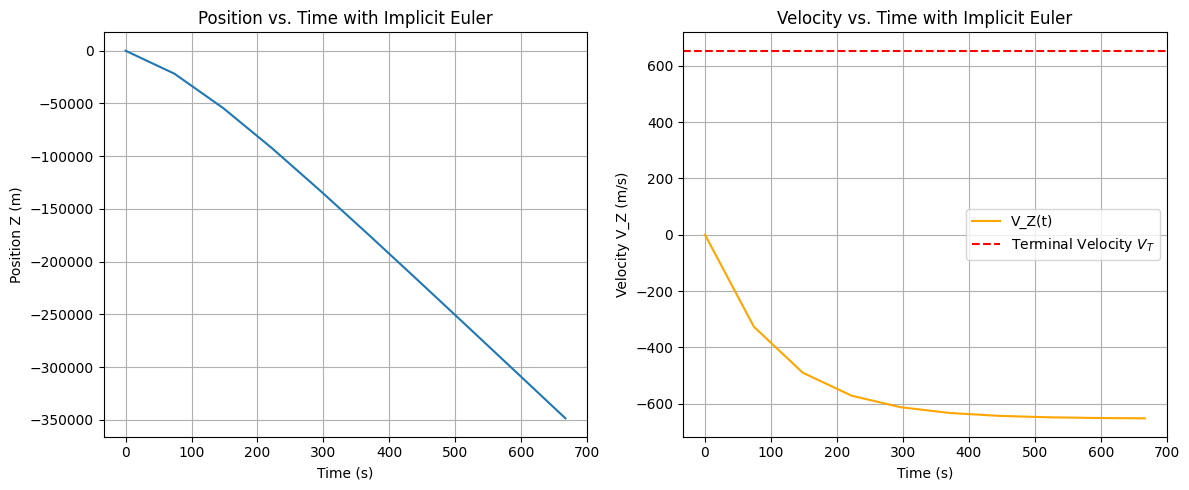

In [22]:
# Time step and simulation parameters
dt = tau              # Larger time step (the coupling timescale)
t_max = 10 * tau          # Total simulation time
num_steps = int(t_max / dt)  # Number of time steps

# Initial conditions
Z = 0      # Initial position (m)
V_Z = 0    # Initial velocity (m/s)

# Arrays to store the solution
Z_vals = np.zeros(num_steps)
VZ_vals = np.zeros(num_steps)
time_vals = np.linspace(0, t_max, num_steps)

# Implicit Euler integration
for i in range(num_steps):
    Z_vals[i] = Z       # Store current position
    VZ_vals[i] = V_Z    # Store current velocity
    
    # Update velocity and position using the implicit Euler method
    V_Z_next = (V_Z - g * dt) / (1 + (6 * np.pi * mu * r / m) * dt)
    Z_next = Z + (V_Z * dt - g * dt**2) / (1 + (6 * np.pi * mu * r / m) * dt)
    
    # Update Z and V_Z for the next iteration
    Z = Z_next
    V_Z = V_Z_next

# Plotting results
plt.figure(figsize=(12, 5))

# Plot Z(t)
plt.subplot(1, 2, 1)
plt.plot(time_vals, Z_vals, label="Z(t)")
plt.xlabel("Time (s)")
plt.ylabel("Position Z (m)")
plt.title("Position vs. Time with Implicit Euler")
plt.grid(True)

# Plot V_Z(t)
plt.subplot(1, 2, 2)
plt.plot(time_vals, VZ_vals, label="V_Z(t)", color="orange")
plt.axhline(y=V_T, color='r', linestyle='--', label="Terminal Velocity $V_T$")
plt.xlabel("Time (s)")
plt.ylabel("Velocity V_Z (m/s)")
plt.title("Velocity vs. Time with Implicit Euler")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


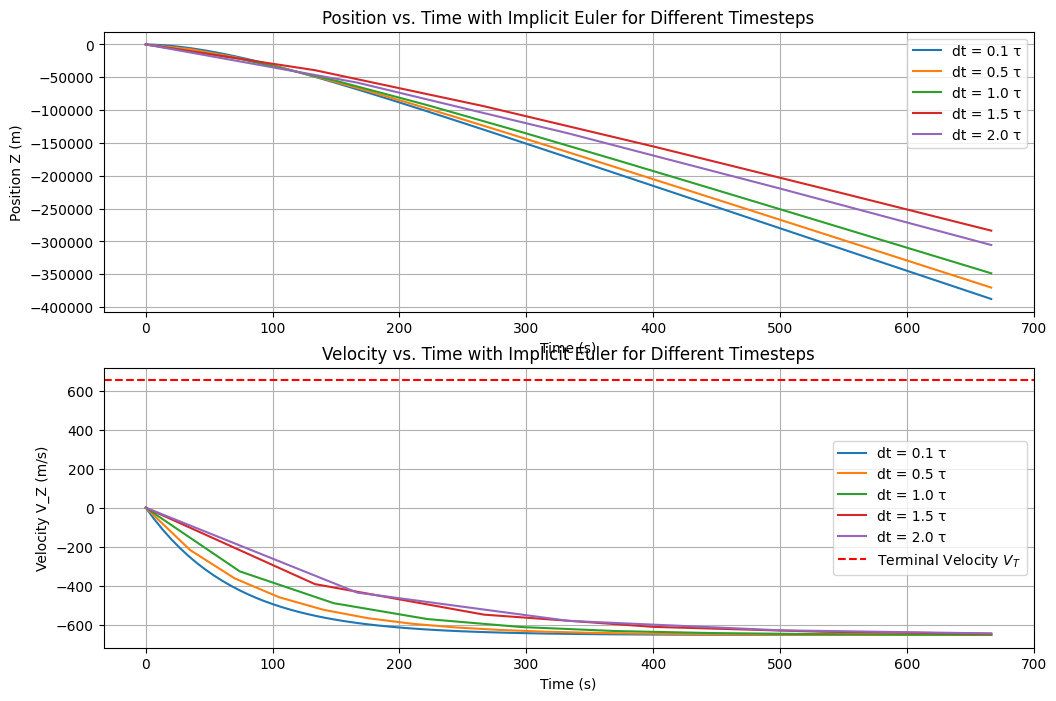

In [23]:
# Time steps to test (from 0.1τ to 2τ)
timesteps = [0.1 * tau, 0.5 * tau, tau, 1.5 * tau, 2 * tau]
t_max = 10 * tau  # Total simulation time

# Plotting setup
plt.figure(figsize=(12, 8))

for dt in timesteps:
    num_steps = int(t_max / dt)  # Number of time steps
    time_vals = np.linspace(0, t_max, num_steps)
    
    # Initial conditions
    Z = 0      # Initial position (m)
    V_Z = 0    # Initial velocity (m/s)
    
    # Arrays to store the solution
    Z_vals = np.zeros(num_steps)
    VZ_vals = np.zeros(num_steps)
    
    # Implicit Euler integration
    for i in range(num_steps):
        Z_vals[i] = Z       # Store current position
        VZ_vals[i] = V_Z    # Store current velocity
        
        # Update velocity and position using the implicit Euler method
        V_Z_next = (V_Z - g * dt) / (1 + (6 * np.pi * mu * r / m) * dt)
        Z_next = Z + (V_Z * dt - g * dt**2) / (1 + (6 * np.pi * mu * r / m) * dt)
        
        # Update Z and V_Z for the next iteration
        Z = Z_next
        V_Z = V_Z_next
    
    # Plot Z(t) for this timestep
    plt.subplot(2, 1, 1)
    plt.plot(time_vals, Z_vals, label=f"dt = {dt/tau:.1f} τ")
    
    # Plot V_Z(t) for this timestep
    plt.subplot(2, 1, 2)
    plt.plot(time_vals, VZ_vals, label=f"dt = {dt/tau:.1f} τ")

# Plot settings
plt.subplot(2, 1, 1)
plt.xlabel("Time (s)")
plt.ylabel("Position Z (m)")
plt.title("Position vs. Time with Implicit Euler for Different Timesteps")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity V_Z (m/s)")
plt.title("Velocity vs. Time with Implicit Euler for Different Timesteps")
plt.axhline(y=V_T, color='r', linestyle='--', label="Terminal Velocity $V_T$")
plt.legend()
plt.grid(True)
plt.show()


THIS IS THE MAGIC OF IMPLICIT SOLVERS !